
Exercicio 1- I)
Pelo metodo analitico:
y(6)=216, dy/dt(6)=108


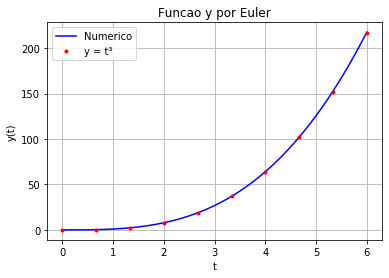

Pelo metodo de Euler:
y(6.0)=217.37070851257215, dy/dt(6.0)=108.88803333928803


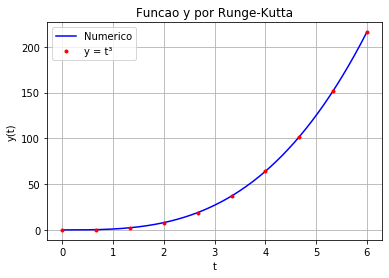

Pelo metodo de Runge-Kutta:
y(6.0)=215.99999997615657, dy/dt(6.0)=107.99999998254536

Exercicio 1- II
a)


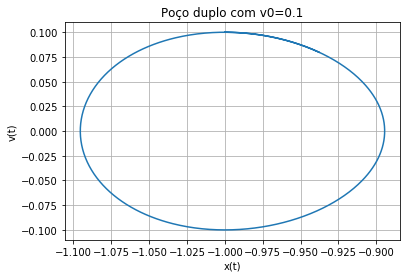

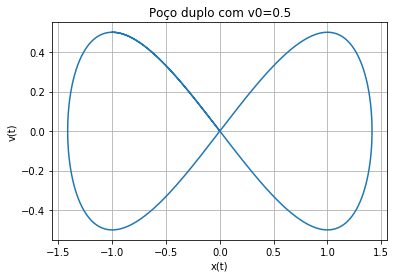

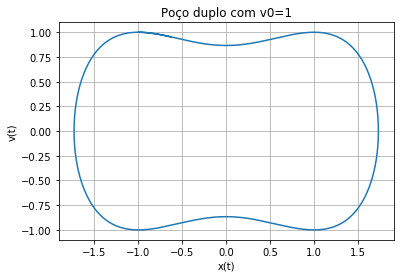

b)


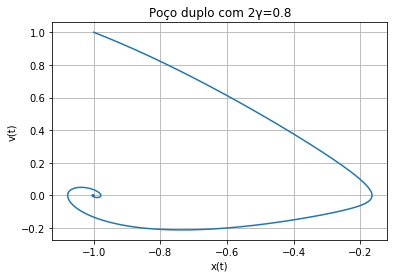

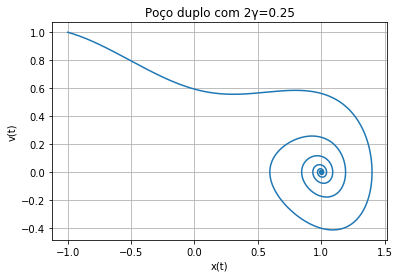

c)


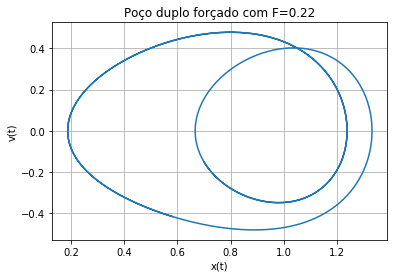

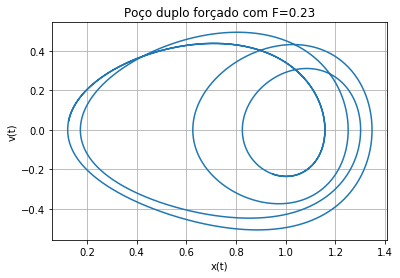

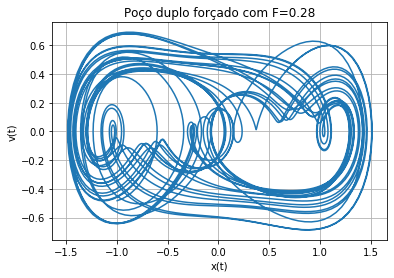

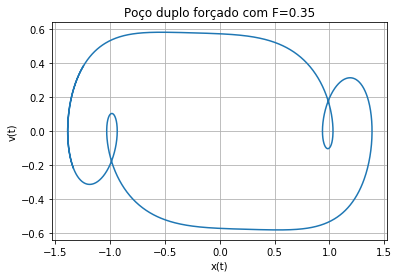

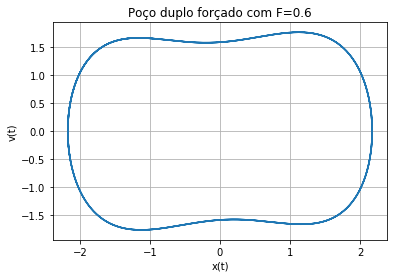

In [0]:
# O PROGRAMA USA DIFERENTES MÉTODOS PARA RESOLUÇÃO DE EQUAÇÕES DIFERENCIAIS COM DIFERENTES
# CONDIÇÕES INCIAIS E PRODUZ OS GRÁFICOS DE SOLUÇÃO

import matplotlib.pyplot as plt
import numpy as np

# 1- I)

def g(t,y,z,F): # g(t,y,z) = z-y+t**3-3*t**2+6*t
  return z-y+t**3-3*t**2+6*t

def Euler(h=0.01,Intervalo=6): # Resolucao da EDO y"=y'-y+t**3-3*t**2+6*t pelo metodo de Euler
  Y=[0]*int(Intervalo/h+1) # Lista dos pontos da funcao y
  Z=[0]*len(Y) # Lista dos pontos da funcao derivada de y
  T=[0]*len(Y)
  for i in range(len(T)-1): # Metodo iterativo
    T[i+1]=h*(i+1)
    Y[i+1]=Y[i]+h*Z[i] # y(t+h)
    Z[i+1]=h*g(T[i],Y[i],Z[i],0)+Z[i] # y'(t+h)
  grafico(Y,T,Intervalo,'Euler')
  print('Pelo metodo de Euler:')
  print('y(%s)=%s, dy/dt(%s)=%s' %(T[int(Intervalo/h)],Y[int(Intervalo/h)],T[int(Intervalo/h)],Z[int(Intervalo/h)]))

def grafico(Y,T,Intervalo,Nome): # Gera grafico
  y=[0]*10
  t=[0]*10
  for i in range(10): # Gerando pontos das funcoes analiticas para comparacao
    t[i]=i*Intervalo/9
    y[i]=t[i]**3
  plt.plot(T,Y,label='Numerico',color='blue')
  plt.plot(t,y,'.',label='y = t³',color='red')
  plt.title('Funcao y por %s' %Nome)
  plt.legend()
  plt.xlabel('t')
  plt.ylabel('y(t)')
  plt.grid()
  plt.show()

print()
print('Exercicio 1- I)')
print('Pelo metodo analitico:')
print('y(6)=%s, dy/dt(6)=%s' %(6**3,3*6**2))
Euler()

def RungeKutta(F=0,Item=1,y0=0,z0=0,Intervalo=6,h=0.01): # Metodo de RungeKutta
  Y=[0]*int(Intervalo/h+1) # Lista dos pontos da funcao y
  Z=[0]*len(Y) # Lista dos pontos da funcao derivada de y
  T=[0]*len(Y) # Lista dos pontos para o tempo
  Y[0]=y0
  Z[0]=z0
  for i in range(len(T)-1): # Metodo iterativo
    k1y=h*Z[i]
    k1z=h*g(T[i],Y[i],Z[i],F)
    k2y=h*(Z[i]+k1z/2)
    k2z=h*g(T[i]+h/2,Y[i]+k1y/2,Z[i]+k1z/2,F)
    k3y=h*(Z[i]+k2z/2)
    k3z=h*g(T[i]+h/2,Y[i]+k2y/2,Z[i]+k2z/2,F)
    k4y=h*(Z[i]+k3z)
    k4z=h*g(T[i]+h,Y[i]+k3y,Z[i]+k3z,F)
    Y[i+1]=Y[i]+(k1y+2*k2y+2*k3y+k4y)/6
    Z[i+1]=Z[i]+(k1z+2*k2z+2*k3z+k4z)/6
    T[i+1]=h*(i+1)
  if Item==1: # Print para o item 1- I
    grafico(Y,T,Intervalo,'Runge-Kutta')
    print('Pelo metodo de Runge-Kutta:')
    print('y(%s)=%s, dy/dt(%s)=%s' %(T[int(Intervalo/h)],Y[int(Intervalo/h)],T[int(Intervalo/h)],Z[int(Intervalo/h)]))
  elif Item==2: # Print para o item 1- II a), b)
    grafico(Y,Z,Intervalo,z0)
  elif Item==3: # Print para o item 1- II c)
    for i in range(int(len(T)*0.9)):
      Y.pop(0)
      Z.pop(0)
    grafico(Y,Z,Intervalo,F)
  elif Item==4: # Print para o item 2- e 3-
    for i in range(20000):
      Y.pop(0)
      T.pop(0)
      Z.pop(0)
    return Y

RungeKutta()
print()

# 1 - II)
# a)

def g(t,x,v,F): # g para o poço duplo
  return (x/2)*(1-x**2)

def grafico(Y,Z,Intervalo,Nome): # Gerando graficos
  plt.plot(Y,Z)
  plt.title('Poço duplo com v0=%s' %Nome)
  plt.xlabel('x(t)')
  plt.ylabel('v(t)')
  plt.grid()
  plt.show()

print('Exercicio 1- II')
print('a)')
RungeKutta(0,2,-1,0.1,7)
RungeKutta(0,2,-1,0.5,110,0.001)
RungeKutta(0,2,-1,1,9)

# b)

def g(t,x,v,F): # g para o poço duplo amortecido
  return (x/2)*(1-x**2)-γ2*v

def grafico(Y,Z,Intervalo,Nome): # Gerando graficos
  plt.plot(Y,Z)
  plt.title('Poço duplo com 2γ=%s' %γ2)
  plt.xlabel('x(t)')
  plt.ylabel('v(t)')
  plt.grid()
  plt.show()

print('b)')
γ2=0.8
RungeKutta(0,2,-1,1,40)
γ2=0.25
RungeKutta(0,2,-1,1,40)

# c)

def g(t,x,v,F): # g para o poço duplo amortecido forçado
  return (x/2)*(1-x**2)-γ2*v+F*np.cos(t)

def grafico(Y,Z,Intervalo,Nome): # Gerando graficos
  plt.plot(Y,Z)
  plt.title('Poço duplo forçado com F=%s' %Nome)
  plt.xlabel('x(t)')
  plt.ylabel('v(t)')
  plt.grid()
  plt.show()

print('c)')

RungeKutta(0.22,3,-1,1,200,0.01)
RungeKutta(0.23,3,-1,1,300,0.01)
RungeKutta(0.28,3,-1,1,4000,0.1)
RungeKutta(0.35,3,-1,1,200,0.01)
RungeKutta(0.6,3,-1,1,200,0.01)


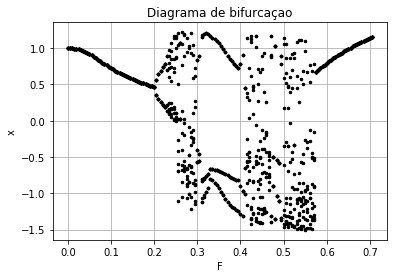

In [0]:
# O PROGRAMA SOLUCIONA A EQUAÇÃO DIFERENCIAL E CRIA O DIAGRAMA DE BIRFUCAÇÃO

import numpy as np
import matplotlib.pyplot as plt

def RungeKutta(F,Item=1,y0=0,z0=0,Intervalo=6,h=0.01):
  Y=[0]*int(Intervalo/h+1) # Lista dos pontos da funcao y     g(t, y, z) = z − y + t3 − 3t2 + 6t
  Z=[0]*len(Y) # Lista dos pontos da funcao derivada de y
  T=[0]*len(Y)
  Y[0]=y0
  Z[0]=z0
  for i in range(len(T)-1): # Metodo iterativo
    k1y=h*Z[i]
    k1z=h*g(T[i],Y[i],Z[i],F)
    k2y=h*(Z[i]+k1z/2)
    k2z=h*g(T[i]+h/2,Y[i]+k1y/2,Z[i]+k1z/2,F)
    k3y=h*(Z[i]+k2z/2)
    k3z=h*g(T[i]+h/2,Y[i]+k2y/2,Z[i]+k2z/2,F)
    k4y=h*(Z[i]+k3z)
    k4z=h*g(T[i]+h,Y[i]+k3y,Z[i]+k3z,F)
    Y[i+1]=Y[i]+(k1y+2*k2y+2*k3y+k4y)/6
    Z[i+1]=Z[i]+(k1z+2*k2z+2*k3z+k4z)/6
    T[i+1]=h*(i+1)
  if Item==1: 
    grafico(Y,T,Intervalo,'Runge-Kutta')
    print('Pelo metodo de Runge-Kutta: y(%s)=%s' %(T[int(Intervalo/h)],Y[int(Intervalo/h)]))
    print('Pelo metodo analitico: y(6)=%s' %(6**3))
  elif Item==2:
    grafico(Y,Z,Intervalo,z0)
  elif Item==3:
    for i in range(int(len(T)*0.9)):
      Y.pop(0)
      Z.pop(0)
    grafico(Y,Z,Intervalo,z0)
  elif Item==4:
    for i in range(20000):
      Y.pop(0)
      Z.pop(0)
    return Y,Z

def g(t,x,v,F):
  γ2=0.25
  return (x/2)*(1-x**2)-γ2*v+F*np.cos(t)

def bifurcacao(Fmax=0.7,dF=0.005,w=1,x0=-1,v0=1): # Gera plot para bifurcacao
  for k in range(int(Fmax/dF+2)):
    F=dF*k
    h=0.02*np.pi/w
    X,Y=RungeKutta(F,4,x0,v0,int(h*30100),h)
    for i in range(10):
      x=X[100*i]
      plt.plot([F],[x],'.',color='black',markersize=5)
  plt.grid()
  plt.xlabel('F')
  plt.ylabel('x')
  plt.title('Diagrama de bifurcaçao')
  plt.show()

bifurcacao()


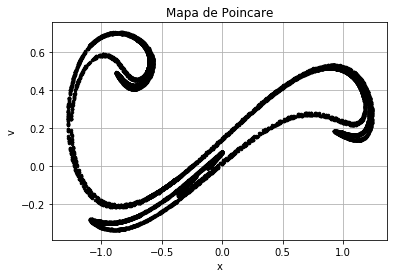

In [0]:
# O PROGRAMA SOLUCIONA A EQUAÇÃO DIFERENCIAL E CRIA O MAPA DE POINCARÉ

import numpy as np
import matplotlib.pyplot as plt

def RungeKutta(F,Item=1,y0=0,z0=0,Intervalo=6,h=0.01):
  Y=[0]*int(Intervalo/h+1) # Lista dos pontos da funcao y     g(t, y, z) = z − y + t3 − 3t2 + 6t
  Z=[0]*len(Y) # Lista dos pontos da funcao derivada de y
  T=[0]*len(Y)
  Y[0]=y0
  Z[0]=z0
  for i in range(len(T)-1): # Metodo iterativo
    k1y=h*Z[i]
    k1z=h*g(T[i],Y[i],Z[i],F)
    k2y=h*(Z[i]+k1z/2)
    k2z=h*g(T[i]+h/2,Y[i]+k1y/2,Z[i]+k1z/2,F)
    k3y=h*(Z[i]+k2z/2)
    k3z=h*g(T[i]+h/2,Y[i]+k2y/2,Z[i]+k2z/2,F)
    k4y=h*(Z[i]+k3z)
    k4z=h*g(T[i]+h,Y[i]+k3y,Z[i]+k3z,F)
    Y[i+1]=Y[i]+(k1y+2*k2y+2*k3y+k4y)/6
    Z[i+1]=Z[i]+(k1z+2*k2z+2*k3z+k4z)/6
    T[i+1]=h*(i+1)
  if Item==1: 
    grafico(Y,T,Intervalo,'Runge-Kutta')
    print('Pelo metodo de Runge-Kutta: y(%s)=%s' %(T[int(Intervalo/h)],Y[int(Intervalo/h)]))
    print('Pelo metodo analitico: y(6)=%s' %(6**3))
  elif Item==2:
    grafico(Y,Z,Intervalo,z0)
  elif Item==3:
    for i in range(int(len(T)*0.9)):
      Y.pop(0)
      Z.pop(0)
    grafico(Y,Z,Intervalo,z0)
  elif Item==4:
    for i in range(20000):
      Y.pop(0)
      Z.pop(0)
    return Y,Z

def g(t,x,v,F):
  γ2=0.25
  return (x/2)*(1-x**2)-γ2*v+F*np.cos(t)
def poincare(F=0.28,Fmax=0.7,dF=0.005,w=1,x0=-1,v0=1): # Gera mapa de poincare
  h=0.02*np.pi/w
  X,V=RungeKutta(F,4,x0,v0,int(h*2040000),h)
  for i in range(20000): # Metodo iterativo
    x=X[100*i]
    v=V[100*i]
    plt.plot([x],[v],'.',color='black',markersize=5)
  plt.grid()
  plt.xlabel('x')
  plt.ylabel('v')
  plt.title('Mapa de Poincare')
  plt.show()

poincare()